# wer exam

In [53]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

## helper functions

In [54]:
def z_test_h0_accepted(Z, z):
    if Z > z:  # reject H0
        print('H0 rejected', 'Z =', Z, '>', 'z =', z)
        return False
    else:
        print('H0 accepted', 'Z =', Z, '<', 'z =', z)
        return True


def Z_score(population_mean_mu0, population_sd_sigma0, sample_mean_x_bar, sample_size_n):
    """
    If no population SD is given, you can use the sample SD
    """
    # https://stats.stackexchange.com/questions/463854/why-no-degrees-of-freedom-for-z-test no dof here
    return abs((sample_mean_x_bar - population_mean_mu0) / (population_sd_sigma0 / np.sqrt(sample_size_n)))


def t_test_h0_accepted(T, t):
    if T > t:  # reject H0
        print('H0 rejected', 'T =', T, '>', 't =', t)
        return False
    else:
        print('H0 accepted', 'T =', T, '<', 't =', t)
        return True


def T_score(population_mean_mu0, sample_mean_x_bar, sample_sd_s, sample_size_n):
    # https://www.omnicalculator.com/statistics/t-test
    # degrees of freedom -> used to find t value
    return abs((sample_mean_x_bar - population_mean_mu0) / (sample_sd_s / np.sqrt(sample_size_n)))

## let's go!

In [55]:
#2
sample = [312, 288, 301, 269, 305, 331]

In [56]:
np.mean(sample)

301.0

In [57]:
np.std(sample)

19.27865832122834

In [59]:
1 - stats.norm.cdf(280, loc = np.mean(sample), scale = np.std(sample))

0.8619864209084078

In [62]:
reach = stats.norm.ppf(0.05, loc = np.mean(sample), scale = np.std(sample))

In [95]:
stats.norm.pdf(reach, loc = np.mean(sample), scale = np.std(sample)) * 100

0.5349731223868692

## Confidence Intervals

In [68]:
stats.norm.interval(0.99, loc = 21.6, scale = 3 / np.sqrt(95))

(20.807176468767675, 22.392823531232327)

In [97]:
s1 = stats.norm.rvs(loc = 21.6, scale = 3 / np.sqrt(95), size = 100)
s2 = stats.norm.rvs(loc = 21.6, scale = 3 / np.sqrt(95), size = 100)

In [98]:
stats.norm.interval(0.99, loc = np.mean(s1), scale = 3 / np.sqrt(95))

(20.77634479850632, 22.36199186097097)

In [99]:
stats.norm.interval(0.99, loc = np.mean(s2), scale = 3 / np.sqrt(95))

(20.8267188911315, 22.41236595359615)

stats.norm.rvs(0.99, loc = 21.6, scale = 3 / np.sqrt(95))

## Binom Test

In [93]:
stats.binom_test(28, n=40, p=0.8, alternative='two-sided')

0.11596733038175033

## Monte Carlo Simulation

In [88]:
# 5
runs = 1000000
results = []
zwischenergebnisse = []

toilet_uses = stats.poisson.rvs(20, size=runs)
field_use = stats.norm.rvs(loc = 320, scale = 50, size = runs)

for i in range(runs):
    toilet_water_use = toilet_uses[i] * 0.7 * 3 + toilet_uses[i] * 0.3 * 1.8
    total_water_use = toilet_water_use + field_use[i]

    results.append(total_water_use)

    if i % 1000 == 0:
        zwischenergebnisse.append(np.percentile(results, q=0.1))

In [84]:
results

[352.04321708129066,
 326.9631736821886,
 277.0107498302617,
 296.9799303690794,
 312.8849370135556,
 363.47843917329624,
 355.7661808620485,
 389.5702567107538,
 406.3968645673564,
 410.180206786096,
 379.02848964261517,
 494.66525572068275,
 278.4290259514882,
 351.3038489989337,
 391.42515184236584,
 373.9732087994401,
 416.4078193747145,
 296.0007643796811,
 376.03062939658696,
 301.27758964543443,
 331.66188925029036,
 372.9335450574991,
 376.62564612739413,
 376.27519641989625,
 373.0339718336052,
 234.99418276297337,
 348.65231261523104,
 472.92346858329665,
 442.7385608359044,
 334.37851375135887,
 381.13322005676434,
 332.48160431188614,
 341.67864192989947,
 385.94060648859966,
 360.3461116800402,
 380.6437882474006,
 301.1727080857613,
 406.55285253560197,
 385.12839940841025,
 378.1659075893841,
 400.6575513696521,
 373.9860796980484,
 396.0796605813095,
 461.43750364242004,
 340.7702684618342,
 338.6616165626477,
 364.32836505416356,
 418.35288542415014,
 427.3464364225149

In [85]:
np.array(results)

array([352.04321708, 326.96317368, 277.01074983, ..., 366.49479788,
       437.54234437, 348.04272945])

In [102]:
# get q = 0.1
np.percentile(results, q=0.9)

251.66106408199798

In [87]:
pd.DataFrame(results).describe()

,0
count,1000000.000000
mean,372.722601
std,51.431359
min,116.699770
25%,338.083775
50%,372.708289
75%,407.379983
max,635.039814


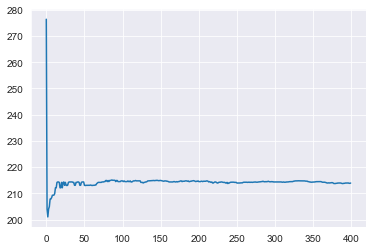

In [96]:
plt.plot(zwischenergebnisse[:400])